In [122]:
# This project is separated in 8 weeks.
# Each week will start with a fully description of our tasks

In [ ]:
# Week 1 

# complete EDA Analysis : dataset exploration with basic statistics, 
# missing values analysis, churn distribution, numeric correlations and heatmaps

In [ ]:
import pandas as pd

df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [123]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [124]:
df.shape


(7043, 21)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [126]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [127]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

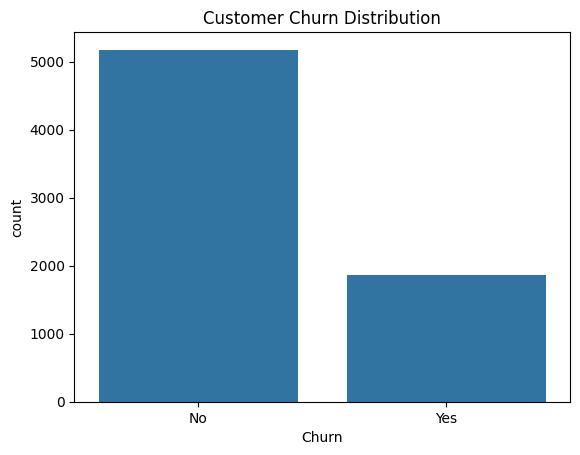

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.show()

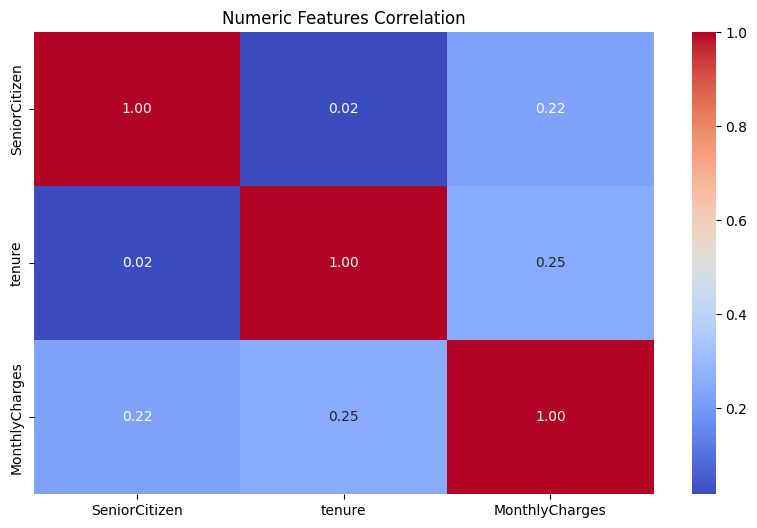

In [129]:
# Correlation between numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric Features Correlation')
plt.show()

In [130]:
# Note: TotalCharges and MonthlyCharges/Tenure show high correlation
# Consider checking multicollinearity or creating ratio features in feature engineering

In [131]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [132]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [133]:
df["TotalCharges"].head(20)

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
Name: TotalCharges, dtype: object

In [134]:
df["TotalCharges"].value_counts().head(10)

TotalCharges
20.2     11
         11
19.75     9
19.65     8
19.9      8
20.05     8
19.55     7
45.3      7
19.45     6
20.25     6
Name: count, dtype: int64

In [135]:
(df["TotalCharges"] == " ").sum()

np.int64(11)

In [136]:
# We have 11 null-empty values in Total Charges.
# We can procced by deleting them, because 11 out of 7000+ rows is not
# going to change our results

# Convert to numeric, empty values will become NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Delete NaN rows
df = df.dropna(subset=["TotalCharges"])

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [137]:
# Check for any type of missing value 
placeholders = ["NA", "N/A", "Unknown"]

(df.isnull() | (df == " ") | df.isin(placeholders)).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [138]:
# Numerical features
num_features = df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical features:", num_features)

# Categorical features
cat_features = df.select_dtypes(include=["object"]).columns
print("Categorical features:", cat_features)


Numerical features: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Categorical features: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [139]:
# Check churn distribution per category
for col in cat_features:
    print(f"\n{col} distribution with Churn:")
    print(pd.crosstab(df[col], df["Churn"], normalize="index"))


customerID distribution with Churn:
Churn        No  Yes
customerID          
0002-ORFBO  1.0  0.0
0003-MKNFE  1.0  0.0
0004-TLHLJ  0.0  1.0
0011-IGKFF  0.0  1.0
0013-EXCHZ  0.0  1.0
...         ...  ...
9987-LUTYD  1.0  0.0
9992-RRAMN  0.0  1.0
9992-UJOEL  1.0  0.0
9993-LHIEB  1.0  0.0
9995-HOTOH  1.0  0.0

[7032 rows x 2 columns]

gender distribution with Churn:
Churn         No       Yes
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046

Partner distribution with Churn:
Churn          No       Yes
Partner                    
No       0.670239  0.329761
Yes      0.802829  0.197171

Dependents distribution with Churn:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.844688  0.155312

PhoneService distribution with Churn:
Churn               No       Yes
PhoneService                    
No            0.750000  0.250000
Yes           0.732525  0.267475

MultipleLines distribution with Churn:
Churn 

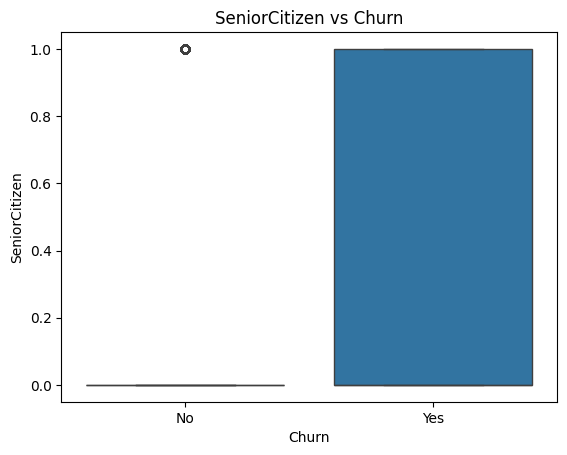

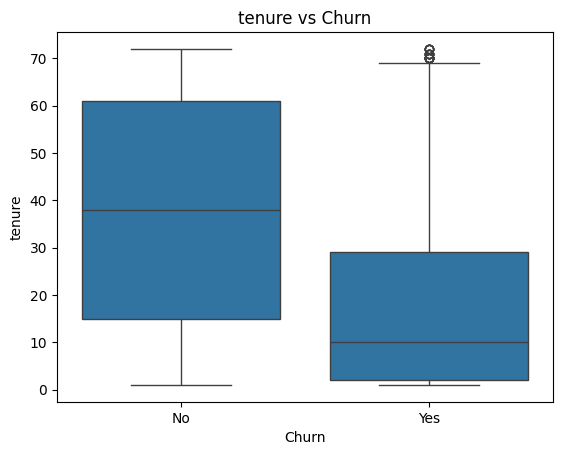

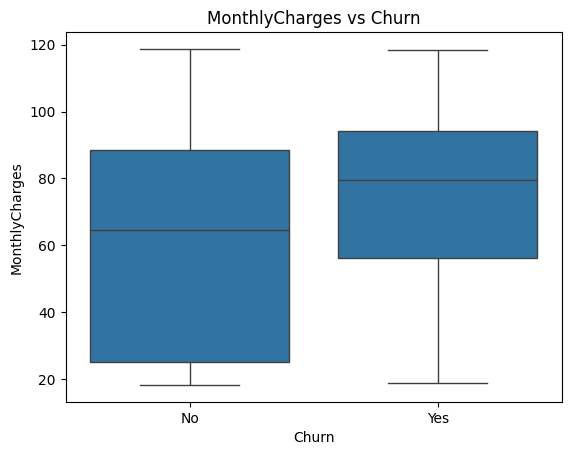

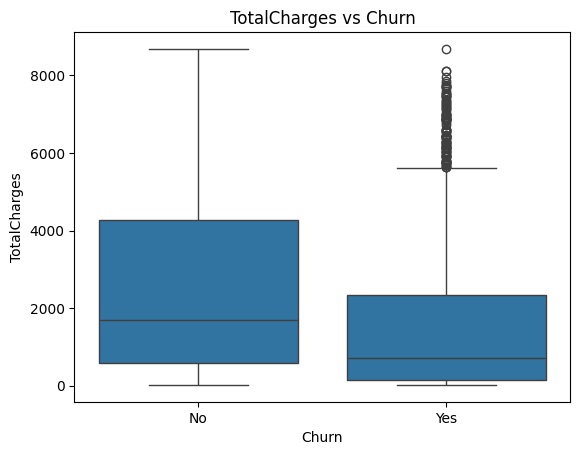

In [140]:
# Create box plots for num features
for col in num_features:
    sns.boxplot(x="Churn", y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

In [141]:
# Compare mean and median of numeric features by Churn
summary = df.groupby("Churn")[num_features].agg(["mean", "median"])
summary

SeniorCitizen            tenure        MonthlyCharges         \
               mean median       mean median           mean median   
Churn                                                                
No         0.128995    0.0  37.650010   38.0      61.307408  64.45   
Yes        0.254682    0.0  17.979133   10.0      74.441332  79.65   

      TotalCharges           
              mean   median  
Churn                        
No     2555.344141  1683.60  
Yes    1531.796094   703.55

In [142]:
# Observed outliers during EDA. no removal applied at baseline stage
# Week 1 complete.